In [1]:
import sys
from pathlib import Path
sys.path.append("..")
import pandas as pd
import numpy as np
import jax.numpy as jnp
import matplotlib.pyplot as plt
from simulation.rotor import MagneticBearing3D
from simulation.pid import PID
from simulation.seal import Seal
from simulation.excitation_signals import *
from simulation.generate_dataset import *

In [33]:
import os

data_dir = Path("../simulation/data/sin_simple/")

data = []
for file in filter(lambda x: x.endswith(".csv"), os.listdir(data_dir)):
    data.append(pd.read_csv(data_dir / Path(file)))

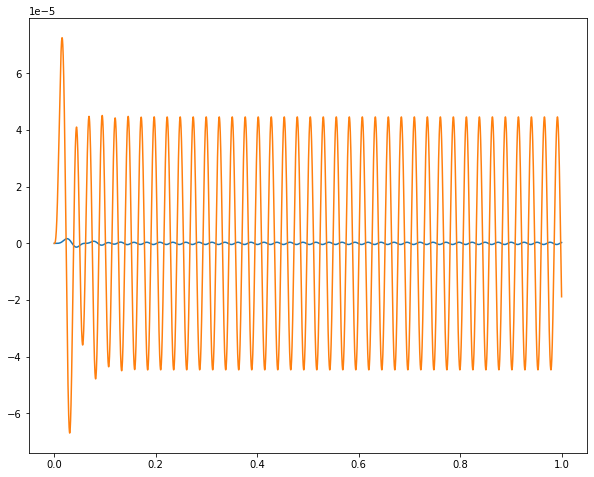

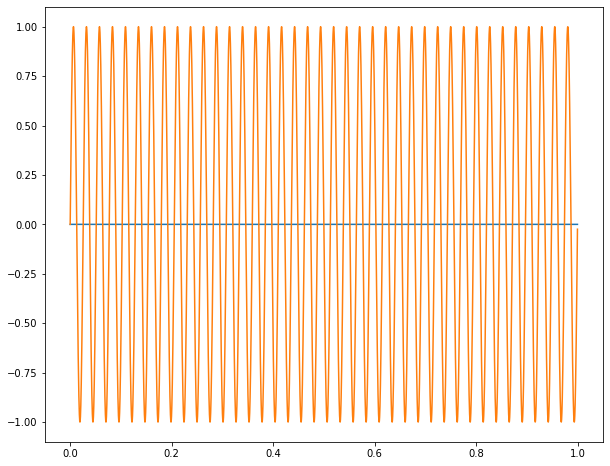

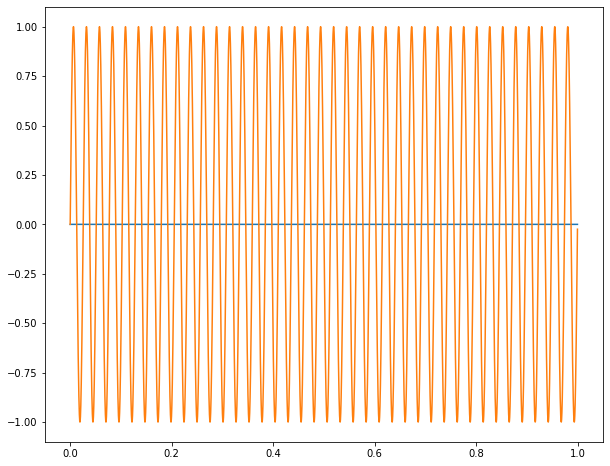

In [40]:
df = data[-1]
df = pd.read_csv(data_dir / Path("excitation_x_episode_0_freq_39Hz.csv"))

plt.figure(figsize=(10,8))
plt.plot(df["t"], df["ay"])
plt.plot(df["t"], df["ax"])
plt.show()

plt.figure(figsize=(10,8))
plt.plot(df["t"], df["f_ay"])
plt.plot(df["t"], df["f_ax"])
plt.show()

plt.figure(figsize=(10,8))
plt.plot(df["t"], df["fy"])
plt.plot(df["t"], df["fx"])
plt.show()

In [20]:
from estimators.frequency import EIVSin
from collections import Counter
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [39]:
f = 49

estimator = EIVSin()

df_x = pd.read_csv(f"../simulation/data/sin_simple/excitation_x_episode_0_freq_{f}Hz_seal_True.csv")
df_y = pd.read_csv(f"../simulation/data/sin_simple/excitation_y_episode_0_freq_{f}Hz_seal_True.csv")

ws = estimator.estimate(df_x=df_x,
                   df_y=df_y,
                   freq=9)

ws

8890
2


{'freq': 9,
 'G': array([[17597.63358475+7094.44561622j,   542.64736616 +104.83078043j],
        [ -542.64736616 -104.83078043j, 12713.80728932+6150.96859235j]]),
 'C': array([[125.45734315,   1.85381521],
        [ -1.85381521, 108.77300625]]),
 'K': array([[20795.3854107 ,   542.64736616],
        [ -542.64736616, 15911.55911527]])}

In [40]:
estimator = EIVSin()

df_x = pd.read_csv(f"../simulation/data/sin_simple/excitation_x_episode_0_freq_{f}Hz_seal_False.csv")
df_y = pd.read_csv(f"../simulation/data/sin_simple/excitation_y_episode_0_freq_{f}Hz_seal_False.csv")

wos = estimator.estimate(df_x=df_x,
                   df_y=df_y,
                   freq=9)
wos

8890
2


{'freq': 9,
 'G': array([[12847.204872+3229.07139379j,     0.         +0.j        ],
        [    0.         +0.j        , 12847.204872+3229.07139379j]]),
 'C': array([[57.10251932,  0.        ],
        [ 0.        , 57.10251932]]),
 'K': array([[16044.95669795,     0.        ],
        [    0.        , 16044.95669795]])}

In [41]:
ws["K"] - wos["K"]

array([[4750.42871275,  542.64736616],
       [-542.64736616, -133.39758268]])

In [23]:
freq = 9

dt = (df_x["t"] - df_y["t"].shift()).median()

df_x = estimator.get_frequency_domain_data(df=df_x,
                                      freq=freq,
                                      dt=dt)

df_y = estimator.get_frequency_domain_data(df=df_y,
                                      freq=freq,
                                      dt=dt)

df = pd.concat([df_x, df_y], ignore_index=False)

# Apenas frequencia de interesse
sel_df = df[(df["freqs"] > freq - 2) & (df["freqs"] < freq + 1)].sort_index()
# Apenas indices que exisitam no dataframe x e y
inds = list(map(lambda x: x[0], (filter(lambda x: x[1] == 2, Counter(sel_df.index).most_common()))))



inds = list(filter(lambda  x: x in sel_df.index, inds))

print(len(inds))
sel_df = sel_df.loc[inds]

KeyError: 't'